EPSG:4326


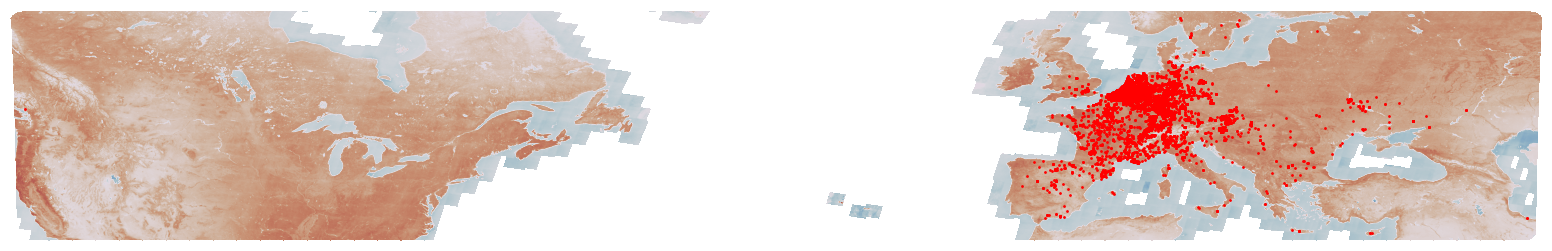

In [15]:
import rasterio
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs

points = pd.read_csv('data/csv/test2.csv')

with rasterio.open('data/tifs/NDVI_Image.tif') as src:
    ndvi = src.read(1)
    print(src.crs)
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]


    # Create a figure with a GeoAxes in the desired projection
    fig, ax = plt.subplots(figsize=(20, 3), subplot_kw={'projection': ccrs.Mercator()})
    ax.axis('off')

    # Show the NDVI image
    # Note: If the image is already in PlateCarree projection, you don't need to specify the transform
    ax.imshow(ndvi, cmap='twilight_shifted', origin='upper', extent=extent)

    # Scatter plot for points
    # The 'transform' argument here ensures the points are correctly projected onto the map
    ax.scatter(points['lon'], points['lat'], transform=ccrs.Mercator(), s=1, c='r')

    #plt.colorbar(label='NDVI')
    #plt.title('Mean NDVI 1970-2000')
    plt.savefig('figures/ndvi_points_map.png', format='png')

In [19]:
import os
import pandas as pd
from concurrent.futures import ThreadPoolExecutor

def get_value_from_array(lat, long, src, array):
    try:
        row, col = src.index(long, lat)
        return array[row, col]
    except Exception as e:
        print(f'Error at {lat}, {long}: {e}')
        return None

# directory = '/home/mpgetz/repos/bee_mapping/data/wc2.1_30s_bio'
all_files = ['NDVI_Image.tif']

print(all_files)

def process_file(file):
    # column_name = file.split("wc2.1_30s_")[1].replace(".tif", "")
    file_path = file
    # print(f'Processing: {column_name}\n')
    column_name = 'NDVI'

    with rasterio.open(file_path) as src:
        array = src.read(1)  # Read the entire file into an array
        df[column_name] = df.apply(lambda row: get_value_from_array(row['lat'], row['lon'], src, array), axis=1)

df = pd.read_csv('points.csv')

with ThreadPoolExecutor(max_workers=1) as executor:
    executor.map(process_file, all_files)

df.to_csv('ndvi_vals.csv')

['NDVI_Image.tif']
